Copyright (c) 2019 [Sebastian Raschka](sebastianraschka.com)

https://github.com/rasbt/python-machine-learning-book-3rd-edition

[MIT License](https://github.com/rasbt/python-machine-learning-book-2nd-edition/blob/master/LICENSE.txt)

# Python. Uczenie maszynowe - kod źródłowy

# Rozdział 11. Praca z nieoznakowanymi danymi — analiza skupień

Zwróć uwagę, że rozszerzenie zawierające nieobowiązkowy znak wodny stanowi niewielki plugin notatnika IPython / Jupyter, który zaprojektowałem w celu powielania kodu źródłowego. Wystarczy pominąć poniższe wiersze kodu:

In [1]:
%load_ext watermark
%watermark -a "Sebastian Raschka" -u -d -v -p numpy,pandas,matplotlib,scipy,sklearn

Sebastian Raschka 
last updated: 2019-12-05 

CPython 3.7.1
IPython 7.10.1

numpy 1.17.4
pandas 0.25.3
matplotlib 3.1.0
scipy 1.3.1
sklearn 0.22


*Korzystanie z rozszerzenia `watermark` nie jest obowiązkowe. Możesz je zainstalować za pomocą polecenia:*  

    conda install watermark -c conda-forge  

lub  

    pip install watermark   

*Więcej informacji znajdziesz pod adresem: https://github.com/rasbt/watermark.*

<br>
<br>

### Spis treści

- [Grupowanie obiektów na podstawie podobieństwa przy użyciu algorytmu centroidów](#Grupowanie-obiektów-na-podstawie-podobieństwa-przy-użyciu-algorytmu-centroidów)
  - [Algorytm centroidów w bibliotece scikit-learn](#Algorytm-centroidów-w-bibliotece-scikit-learn)
  - [Inteligentniejszy sposób dobierania pierwotnych centroidów za pomocą algorytmu k-means++](#Inteligentniejszy-sposób-dobierania-pierwotnych-centroidów-za-pomocą-algorytmu-k-means++)
  - [Twarda i miękka analiza skupień](#Twarda-i-miękka-analiza-skupień)
  - [Stosowanie metody „łokcia” do wyszukiwania optymalnej liczby skupień](#Stosowanie-metody-„łokcia”-do-wyszukiwania-optymalnej-liczby-skupień)
  - [Ujęcie ilościowe jakości analizy skupień za pomocą wykresu profilu](#Ujęcie-ilościowe-jakości-analizy-skupień-za-pomocą-wykresu-profilu)
- [Organizowanie skupień do postaci drzewa skupień](#Organizowanie-skupień-do-postaci-drzewa-skupień)
  - [Oddolne grupowanie skupień](#Oddolne-grupowanie-skupień)
  - [Przeprowadzanie hierarchicznej analizy skupień na macierzy odległości](#Przeprowadzanie-hierarchicznej-analizy-skupień-na-macierzy-odległości)
  - [Dołączanie dendrogramów do mapy cieplnej](#Dołączanie-dendrogramów-do-mapy-cieplnej)
  - [Aglomeracyjna analiza skupień w bibliotece scikit-learn](#Aglomeracyjna-analiza-skupień-w-bibliotece-scikit-learn)
- [Wyznaczanie rejonów o dużej gęstości za pomocą algorytmu DBSCAN](#Wyznaczanie-rejonów-o-dużej-gęstości-za-pomocą-algorytmu-DBSCAN)
- [Podsumowanie](#Podsumowanie)

<br>
<br>

In [1]:
from IPython.display import Image
%matplotlib inline

# Grupowanie obiektów na podstawie podobieństwa przy użyciu algorytmu centroidów

## Algorytm centroidów w bibliotece scikit-learn

In [3]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=150, 
                  n_features=2, 
                  centers=3, 
                  cluster_std=0.5, 
                  shuffle=True, 
                  random_state=0)

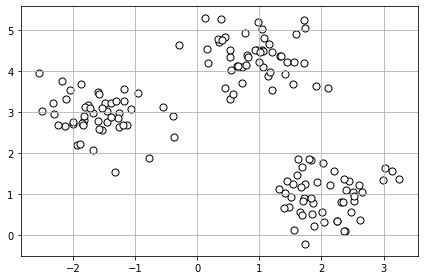

In [4]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], 
            c='white', marker='o', edgecolor='black', s=50)
plt.grid()
plt.tight_layout()
#plt.savefig('rysunki/11_01.png', dpi=300)
plt.show()

In [5]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, 
            init='random', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)

y_km = km.fit_predict(X)

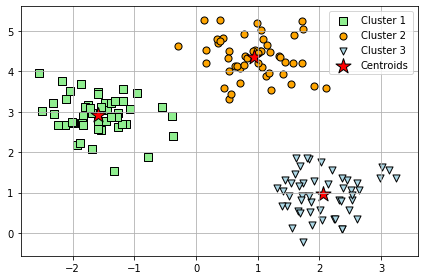

In [6]:
plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=50, c='lightgreen',
            marker='s', edgecolor='black',
            label='Skupienie 1.')
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=50, c='orange',
            marker='o', edgecolor='black',
            label='Skupienie 2.')
plt.scatter(X[y_km == 2, 0],
            X[y_km == 2, 1],
            s=50, c='lightblue',
            marker='v', edgecolor='black',
            label='Skupienie 3.')
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250, marker='*',
            c='red', edgecolor='black',
            label='Centroidy')
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
#plt.savefig('rysunki/11_02.png', dpi=300)
plt.show()

<br>

## Inteligentniejszy sposób dobierania pierwotnych centroidów za pomocą algorytmu k-means++

...

## Twarda i miękka analiza skupień

...

## Stosowanie metody „łokcia” do wyszukiwania optymalnej liczby skupień

In [7]:
print('Zniekształcenie: %.2f' % km.inertia_)

Distortion: 72.48


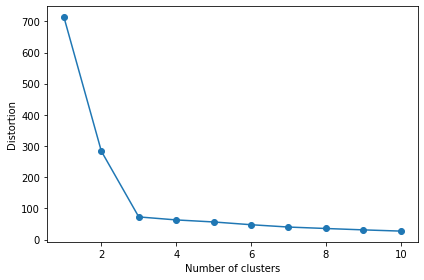

In [8]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Liczba skupień')
plt.ylabel('Zniekształcenie')
plt.tight_layout()
#plt.savefig('rysunki/11_03.png', dpi=300)
plt.show()

<br>

## Ujęcie ilościowe jakości analizy skupień za pomocą wykresu profilu

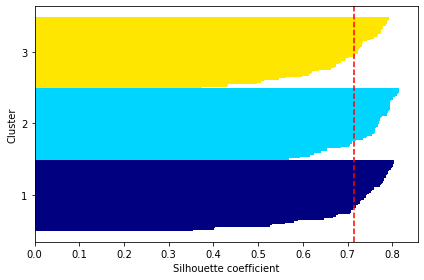

In [9]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

km = KMeans(n_clusters=3, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Skupienie')
plt.xlabel('Współczynnik profilu')

plt.tight_layout()
#plt.savefig('rysunki/11_04.png', dpi=300)
plt.show()

Porównanie z nieprawidłowo przeprowadzoną analizą skupień:

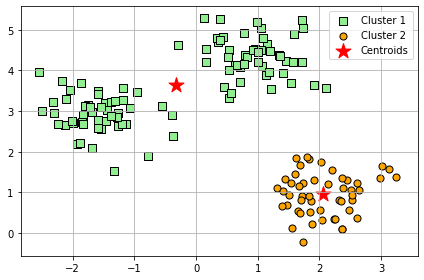

In [10]:
km = KMeans(n_clusters=2,
            init='k-means++',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=50,
            c='lightgreen',
            edgecolor='black',
            marker='s',
            label='Skupienie 1.')
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=50,
            c='orange',
            edgecolor='black',
            marker='o',
            label='Skupienie 2.')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
            s=250, marker='*', c='red', label='Centroidy')
plt.legend()
plt.grid()
plt.tight_layout()
#plt.savefig('rysunki/11_05.png', dpi=300)
plt.show()

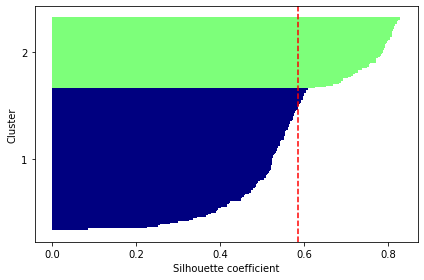

In [11]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Skupienie')
plt.xlabel('Współczynnik profilu')

plt.tight_layout()
#plt.savefig('rysunki/11_06.png', dpi=300)
plt.show()

<br>
<br>

# Organizowanie skupień do postaci drzewa skupień

## Oddolne grupowanie skupień

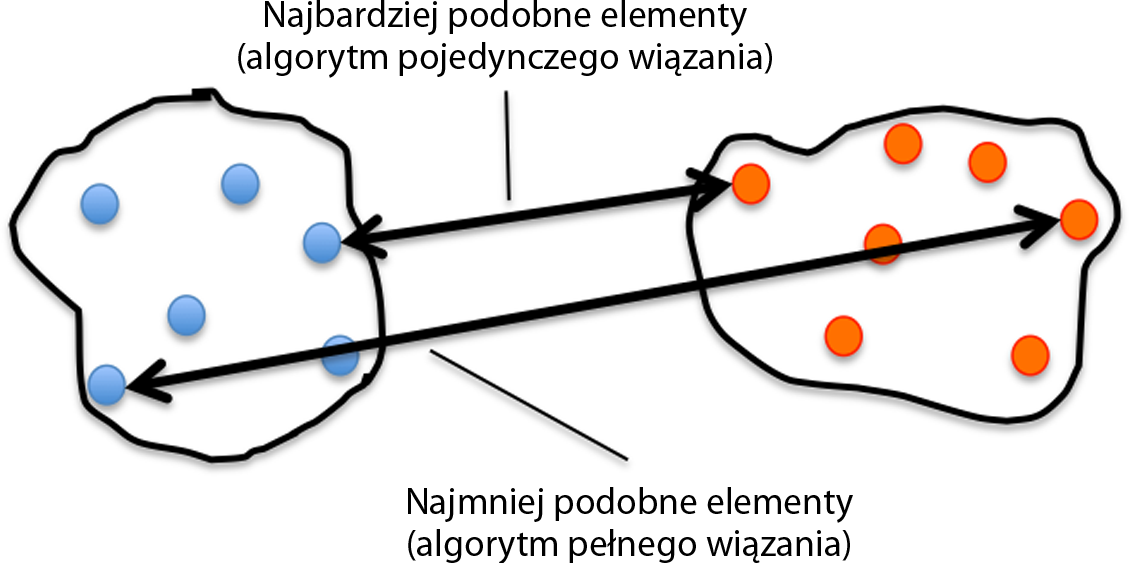

In [2]:
Image(filename='./rysunki/11_07.png', width=400) 

In [13]:
import pandas as pd
import numpy as np

np.random.seed(123)

variables = ['X', 'Y', 'Z']
labels = ['ID_0', 'ID_1', 'ID_2', 'ID_3', 'ID_4']

X = np.random.random_sample([5, 3])*10
df = pd.DataFrame(X, columns=variables, index=labels)
df

,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


<br>

## Przeprowadzanie hierarchicznej analizy skupień na macierzy odległości

In [14]:
from scipy.spatial.distance import pdist, squareform

row_dist = pd.DataFrame(squareform(pdist(df, metric='euclidean')),
                        columns=labels,
                        index=labels)
row_dist

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,4.973534,5.516653,5.899885,3.835396
ID_1,4.973534,0.000000,4.347073,5.104311,6.698233
ID_2,5.516653,4.347073,0.000000,7.244262,8.316594
ID_3,5.899885,5.104311,7.244262,0.000000,4.382864
ID_4,3.835396,6.698233,8.316594,4.382864,0.000000


Możemy przekazać zwięzłą macierz odległości (trójkątną górną) wyliczoną z funkcji `pdist` albo "oryginalną" tablicę danych i zdefiniować argument `metric='euclidean'` w funkcji `linkage`. Nie powinniśmy jednak przekazywać kwadratowej macierzy odległości, ponieważ zostaną wyznaczone odmienne wartości dystansów (mimo że końcowy wynik analizy skupień będzie taki sam).

In [15]:
# 1. Nieprawidłowe podejście: kwadratowa macierz odległości

from scipy.cluster.hierarchy import linkage

row_clusters = linkage(row_dist, method='complete', metric='euclidean')
pd.DataFrame(row_clusters,
             columns=['Etykieta rzędu 1', 'Etykieta rzędu 2',
                      'Odległość', 'Liczba elementów skupienia'],
             index=['Skupienie %d.' % (i + 1)
                    for i in range(row_clusters.shape[0])])

/Users/sebastian/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """


,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,6.521973,2.0
cluster 2,1.0,2.0,6.729603,2.0
cluster 3,3.0,5.0,8.539247,3.0
cluster 4,6.0,7.0,12.444824,5.0


In [16]:
# 2. Prawidłowe podejście: gęsta macierz odległości

row_clusters = linkage(pdist(df, metric='euclidean'), method='complete')
pd.DataFrame(row_clusters,
             columns=['Etykieta rzędu 1', 'Etykieta rzędu 2',
                      'Odległość', 'Liczba elementów skupienia'],
             index=['Skupienie %d.' % (i + 1) 
                    for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


In [17]:
# 3. Prawidłowe podejście: macierz wprowadzanych danych

row_clusters = linkage(df.values, method='complete', metric='euclidean')
pd.DataFrame(row_clusters,
             columns=['Etykieta rzędu 1', 'Etykieta rzędu 2',
                      'Odległość', 'Liczba elementów skupienia'],
             index=['Skupienie %d.' % (i + 1)
                    for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


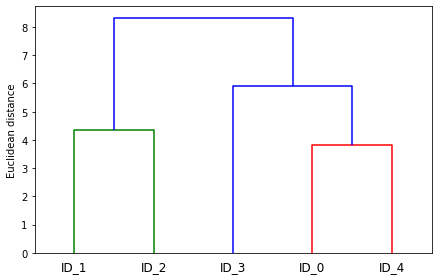

In [18]:
from scipy.cluster.hierarchy import dendrogram

# jeżeli chcesz wygenerować dendrogram w kolorze czarnym (część 1/2):
# from scipy.cluster.hierarchy import set_link_color_palette
# set_link_color_palette(['black'])

row_dendr = dendrogram(row_clusters, 
                       labels=labels,
                       # jeżeli chcesz wygenerować dendrogram w kolorze czarnym (część 2/2):
                       # color_threshold=np.inf
                       )
plt.tight_layout()
plt.ylabel('Odległość euklidesowa')
#plt.savefig('rysunki/11_11.png', dpi=300, 
#            bbox_inches='tight')
plt.show()

<br>

## Dołączanie dendrogramów do mapy cieplnej

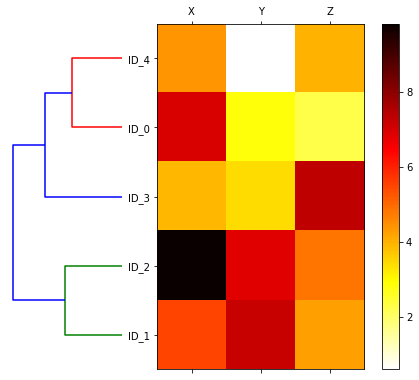

In [19]:
# tworzy poziomy dendrogram
fig = plt.figure(figsize=(8, 8), facecolor='white')
axd = fig.add_axes([0.09, 0.1, 0.2, 0.6])

# uwaga: dla biblioteki matplotlib w wersji  < v1.5.1, zmień parametr orientation='right'
row_dendr = dendrogram(row_clusters, orientation='left')

# sortuje dane pod względem wyników analizy skupień
df_rowclust = df.iloc[row_dendr['leaves'][::-1]]

axd.set_xticks([])
axd.set_yticks([])

# usuwa osie układu współrzędnych z dendrogramu
for i in axd.spines.values():
    i.set_visible(False)

# rysuje mapę cieplną
axm = fig.add_axes([0.23, 0.1, 0.6, 0.6])  # położenie osi x, położenie osi y, szerokość, wysokość
cax = axm.matshow(df_rowclust, interpolation='nearest', cmap='hot_r')
fig.colorbar(cax)
axm.set_xticklabels([''] + list(df_rowclust.columns))
axm.set_yticklabels([''] + list(df_rowclust.index))

#plt.savefig('rysunki/11_12.png', dpi=300)
plt.show()

<br>

## Aglomeracyjna analiza skupień w bibliotece scikit-learn

In [20]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=3, 
                             affinity='euclidean', 
                             linkage='complete')
labels = ac.fit_predict(X)
print('Etykiety skupień: %s' % labels)

Cluster labels: [1 0 0 2 1]


In [21]:
ac = AgglomerativeClustering(n_clusters=2, 
                             affinity='euclidean', 
                             linkage='complete')
labels = ac.fit_predict(X)
print('Etykiety skupień: %s' % labels)

Cluster labels: [0 1 1 0 0]


<br>
<br>

# Wyznaczanie rejonów o dużej gęstości za pomocą algorytmu DBSCAN

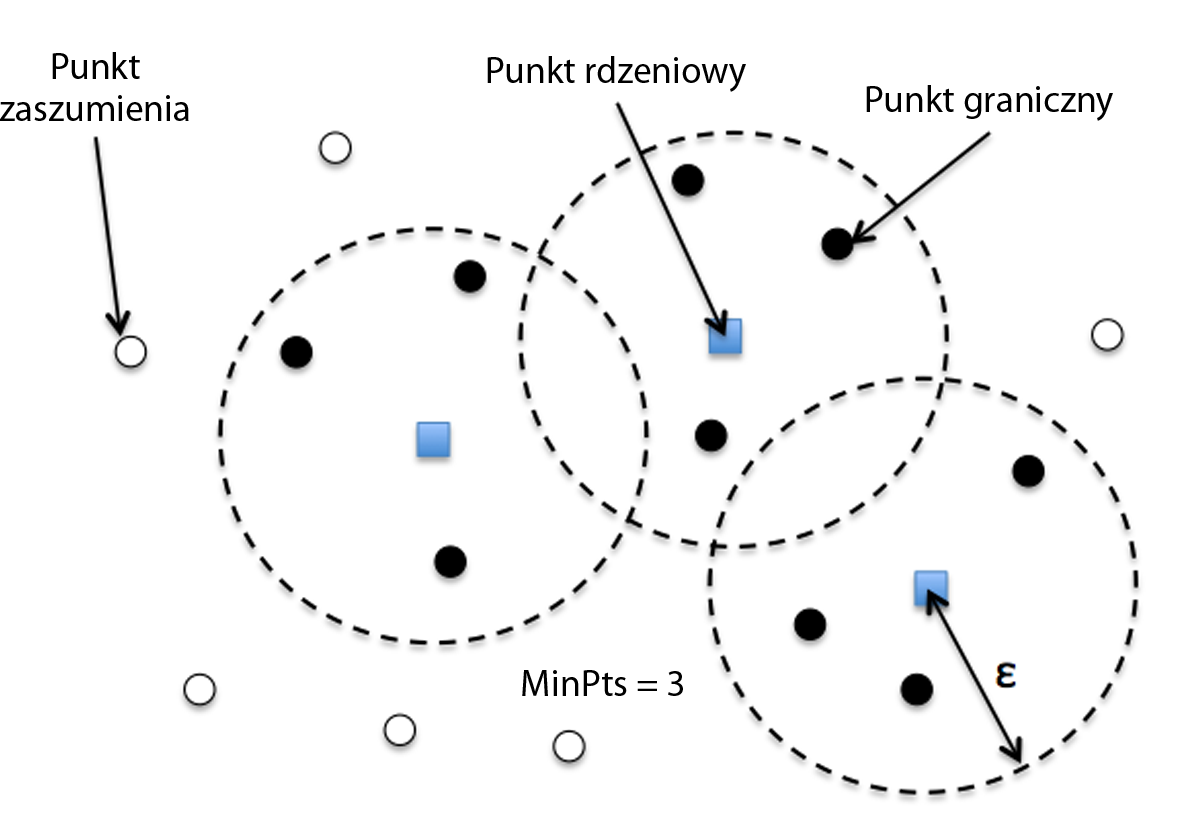

In [3]:
Image(filename='rysunki/11_13.png', width=500) 

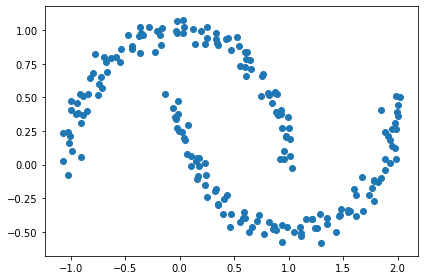

In [23]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
plt.scatter(X[:, 0], X[:, 1])
plt.tight_layout()
#plt.savefig('rysunki/11_14.png', dpi=300)
plt.show()

Analiza skupień za pomocą algorytmu centroidów oraz algorytmu aglomeracyjnego:

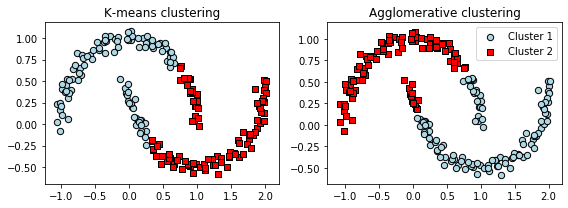

In [24]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))

km = KMeans(n_clusters=2, random_state=0)
y_km = km.fit_predict(X)
ax1.scatter(X[y_km == 0, 0], X[y_km == 0, 1],
            edgecolor='black',
            c='lightblue', marker='o', s=40, label='Skupienie 1.')
ax1.scatter(X[y_km == 1, 0], X[y_km == 1, 1],
            edgecolor='black',
            c='red', marker='s', s=40, label='Skupienie 2.')
ax1.set_title('Algorytm centroidów')

ac = AgglomerativeClustering(n_clusters=2,
                             affinity='euclidean',
                             linkage='complete')
y_ac = ac.fit_predict(X)
ax2.scatter(X[y_ac == 0, 0], X[y_ac == 0, 1], c='lightblue',
            edgecolor='black',
            marker='o', s=40, label='Skupienie 1.')
ax2.scatter(X[y_ac == 1, 0], X[y_ac == 1, 1], c='red',
            edgecolor='black',
            marker='s', s=40, label='Skupienie 2.')
ax2.set_title('Aglomeracyjna analiza skupień')

plt.legend()
plt.tight_layout()
#plt.savefig('rysunki/11_15.png', dpi=300)
plt.show()

Gęstościowa analiza skupień:

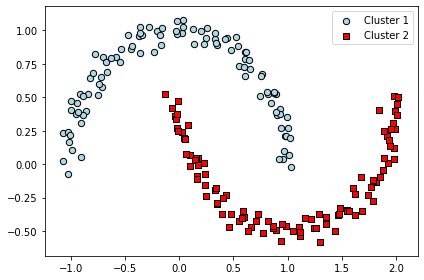

In [25]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.2, min_samples=5, metric='euclidean')
y_db = db.fit_predict(X)
plt.scatter(X[y_db == 0, 0], X[y_db == 0, 1],
            c='lightblue', marker='o', s=40,
            edgecolor='black', 
            label='Skupienie 1.')
plt.scatter(X[y_db == 1, 0], X[y_db == 1, 1],
            c='red', marker='s', s=40,
            edgecolor='black', 
            label='Skupienie 2.')
plt.legend()
plt.tight_layout()
#plt.savefig('rysunki/11_16.png', dpi=300)
plt.show()

<br>
<br>

# Podsumowanie

...

---

Czytelnicy mogą zignorować poniższą komórkę.

In [26]:
! python ../.convert_notebook_to_script.py --input r11.ipynb --output r11.py

[NbConvertApp] Converting notebook ch11.ipynb to script
[NbConvertApp] Writing 14114 bytes to ch11.py
